In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
import wqchartpy
import datetime

In [5]:
wq_df = pd.read_csv('../data/MasterWaterQuality.csv', parse_dates=['Sampling time'])
wq_df

,ID,Location,Sampling time,dD vs vsmow,d18O vs vsmow,Lithium,Sodium,Ammonium,Potassium,Magnesium,...,Bromide,Nitrate,Phosphate,Sulfate,pH,pOH,Total Alkalinity (mg/L as CaCO3),Bicarbonate,EC(us/cm),color
0,LJ000,Porter Sink,2021-05-04 13:00:00,15.0,3.48,0.0,2.440,0.0,1.077,1.812,...,0.0,0.1223,0.0,0.0,6.52,7.48,13.8,16.836,52.1,k
1,LJ001,Porter Sink,2021-06-07 13:49:00,25.9,6.29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.11,8.89,2.8,3.416,44.5,k
2,LJ002,Porter Sink,2021-06-08 13:08:00,23.3,5.29,0.0,1.818,0.0,0.949,0.966,...,0.0,0.2130,0.0,0.0,6.55,7.45,6.0,7.320,32.0,k
3,LJ003,Porter Sink,2021-06-14 17:20:00,29.4,6.43,0.0,2.275,0.0,0.733,1.023,...,0.0,0.1929,0.0,0.0,5.99,8.01,7.2,8.784,35.0,k
4,LJ004,Porter Sink,2021-06-21 11:18:00,5.1,3.20,0.0,2.439,0.0,0.778,1.197,...,0.0,0.0000,0.0,0.0,6.31,7.69,9.8,11.956,38.0,k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,PRE001,Rain,2021-06-23 13:50:00,-26.6,-4.25,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
150,PRE002,Rain,2021-07-05 15:39:00,-50.6,-7.05,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
151,PRE003,Rain,2021-07-18 13:15:00,-5.8,-2.93,NaN,NaN,NaN,NaN,NaN,...,0.0,0.2019,0.0,0.0,NaN,NaN,NaN,NaN,NaN,y
152,PRE004,Rain,2021-08-12 17:10:00,4.5,-1.01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y


In [6]:
format_df = pd.DataFrame()

format_df['Sample'] = wq_df['ID']
format_df['Label'] = wq_df['Location']
format_df['Color']=wq_df['color']
format_df['Marker']='o'
format_df.loc[format_df['Label']== "FSU Well", 'Marker'] = 's'
format_df['Size']=30
format_df['Alpha']=0.9
format_df['pH'] = wq_df['pH']
format_df['Ca'] = wq_df['Calcium']
format_df['Mg'] = wq_df['Magnesium']
format_df['Na'] = wq_df['Sodium']              
format_df['K'] = wq_df['Potassium']   
format_df['HCO3'] = wq_df['Bicarbonate']
format_df['Cl'] = wq_df['Chloride']

format_df['SO4'] = wq_df['Sulfate'].values
format_df['TDS'] = wq_df['EC(us/cm)']*0.7
#format_df['Day']= wq_df['Sampling time'].dt.dayofyear-124
format_df


,Sample,Label,Color,Marker,Size,Alpha,pH,Ca,Mg,Na,K,HCO3,Cl,SO4,TDS
0,LJ000,Porter Sink,k,o,30,0.9,6.52,3.560,1.812,2.440,1.077,16.836,5.9191,0.0,36.47
1,LJ001,Porter Sink,k,o,30,0.9,5.11,NaN,NaN,NaN,NaN,3.416,NaN,NaN,31.15
2,LJ002,Porter Sink,k,o,30,0.9,6.55,2.393,0.966,1.818,0.949,7.320,4.6700,0.0,22.40
3,LJ003,Porter Sink,k,o,30,0.9,5.99,2.460,1.023,2.275,0.733,8.784,3.8784,0.0,24.50
4,LJ004,Porter Sink,k,o,30,0.9,6.31,2.656,1.197,2.439,0.778,11.956,3.8762,0.0,26.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,PRE001,Rain,y,o,30,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,PRE002,Rain,y,o,30,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,PRE003,Rain,y,o,30,0.9,NaN,NaN,NaN,NaN,NaN,NaN,0.1360,0.0,NaN
152,PRE004,Rain,y,o,30,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
format_df=format_df.dropna()
format_df.reset_index(drop=True, inplace=True)
format_df

#format_df.loc[:, 'Color'] = 1 * format_df.loc[:, 'Day']

,Sample,Label,Color,Marker,Size,Alpha,pH,Ca,Mg,Na,K,HCO3,Cl,SO4,TDS
0,LJ000,Porter Sink,k,o,30,0.9,6.52,3.560,1.812,2.440,1.0770,16.836,5.9191,0.0000,36.47
1,LJ002,Porter Sink,k,o,30,0.9,6.55,2.393,0.966,1.818,0.9490,7.320,4.6700,0.0000,22.40
2,LJ003,Porter Sink,k,o,30,0.9,5.99,2.460,1.023,2.275,0.7330,8.784,3.8784,0.0000,24.50
3,LJ004,Porter Sink,k,o,30,0.9,6.31,2.656,1.197,2.439,0.7780,11.956,3.8762,0.0000,26.60
4,LJ005,Porter Sink,k,o,30,0.9,6.12,3.499,1.543,4.056,2.8490,13.298,5.0591,0.0000,41.65
5,LJ006,Porter Sink,k,o,30,0.9,6.59,1.084,3.204,3.366,2.7480,13.542,5.7432,0.0000,36.12
6,LJ007,Porter Sink,k,o,30,0.9,6.24,0.866,2.321,1.665,0.4050,10.126,2.7345,0.0000,20.65
7,LJ008,Porter Sink,k,o,30,0.9,6.19,2.581,0.987,2.388,0.6600,11.346,3.0387,0.0000,25.13
8,LJ009,Porter Sink,k,o,30,0.9,6.24,2.585,0.970,2.381,0.7700,10.614,2.9362,0.0000,24.78
9,LJ010,Porter Sink,k,o,30,0.9,6.07,2.521,0.932,2.539,1.3360,9.638,4.0744,0.0000,27.65


Trilinear Piper plot created. Saving it to C:\Users\kcompare\OneDrive - Florida State University (1)\Documents\PhD\Research\LakeJacksonSinkhole\code 



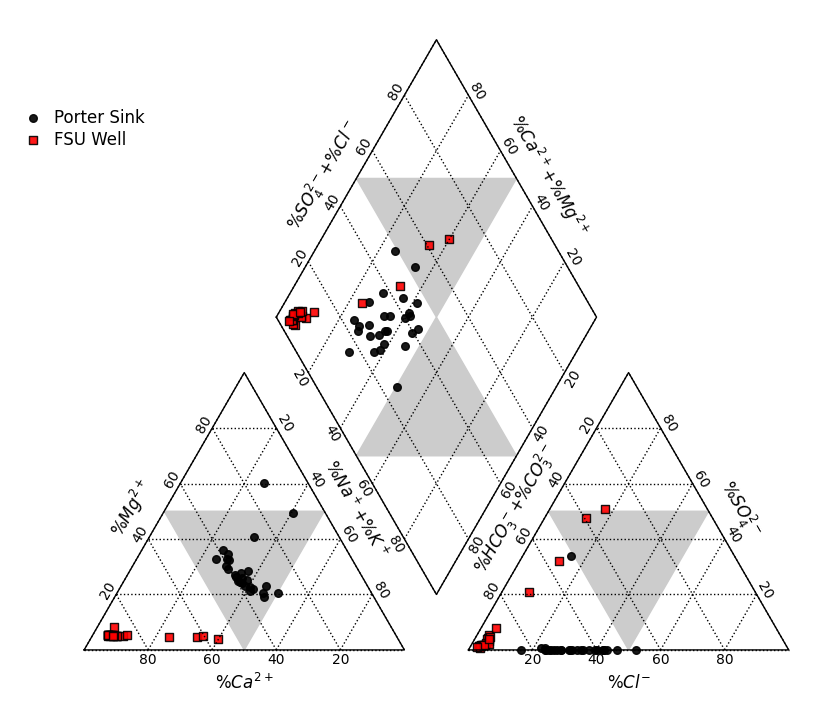

In [5]:
from wqchartpy import triangle_piper

# Draw the diagram
triangle_piper.plot(format_df, unit='mg/L', figname='../plots/Piper_temporal', figformat='jpg')

Gaillardet plot created. Saving it to C:\Users\kcompare\OneDrive - Florida State University (1)\Documents\PhD\Research\LakeJacksonSinkhole\code 



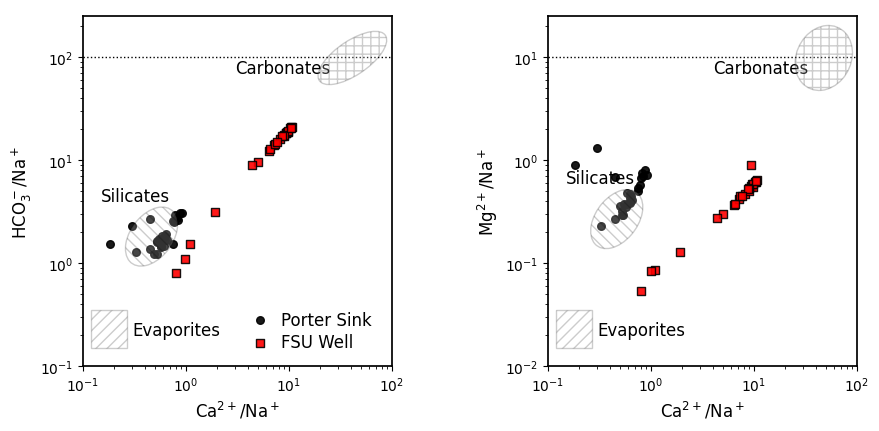

In [6]:
from wqchartpy import gaillardet; 
gaillardet.plot(format_df, unit='mg/L', figname='../plots/Gaillardet', figformat='jpg')

Gibbs plot created. Saving it to C:\Users\kcompare\OneDrive - Florida State University (1)\Documents\PhD\Research\LakeJacksonSinkhole\code 



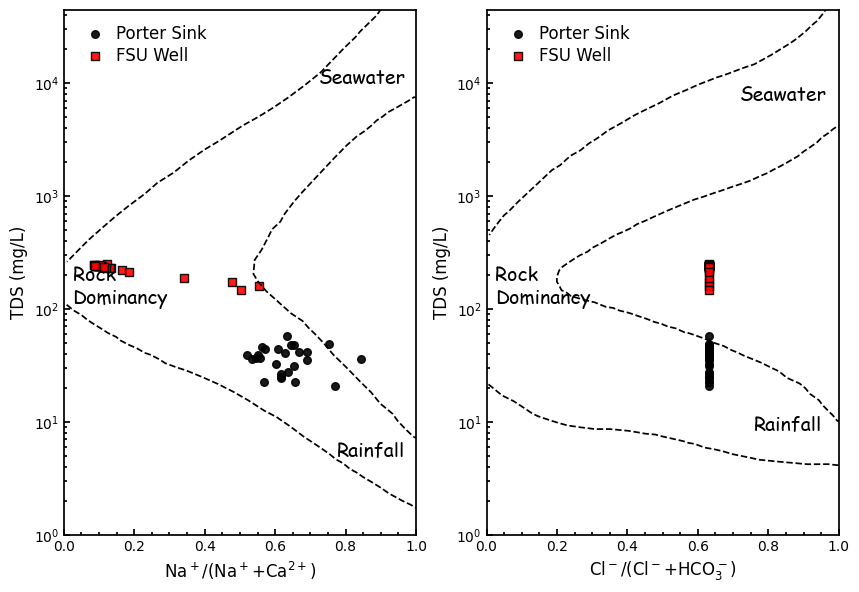

In [34]:
format_df2 = pd.DataFrame()
format_df2['Sample'] = format_df['Sample']
format_df2['Label'] = format_df['Label']
format_df2['Color']=format_df['Color']
format_df2['Marker']='o'
format_df2.loc[format_df2['Label']== "FSU Well", 'Marker'] = 's'
format_df2['Size']=30
format_df2['Alpha']=0.9
format_df2['Ca'] = format_df['Ca']
format_df2['Na'] = format_df['Na']            
format_df2['HCO3'] = format_df['HCO3']
format_df2['Cl'] = format_df['Cl'].values

format_df2['SO4'] = format_df['SO4']
format_df2['TDS'] = format_df['TDS']

from wqchartpy import gibbs; 
gibbs.plot(format_df, unit='mg/L', figname='../plots/Gibbs', figformat='jpg')

# Looking at this with Katz Data

In [6]:
UFA_df=pd.read_csv('../data/GeostatsDataset.csv')
UFA_df=UFA_df.drop(columns=["Unnamed: 15","Unnamed: 16"])

In [8]:
UFA_df['HC3/na']=UFA_df['HCO3']/UFA_df['Na']
UFA_df

,Sample,Label,Color,Marker,Size,Alpha,pH,Ca,Mg,Na,K,HCO3,Cl,SO4,TDS,HC3/na
0,LB-I,Surficial_Aquifer,Red,o,30,0.6,5.00,1.803510,0.631930,2.092069,0.625573,2.074571,2.907146,5.47542,17.0,0.991636
1,LB2-S,Surficial_Aquifer,Red,o,30,0.6,5.99,1.883666,0.631930,1.793202,0.390983,11.105058,3.190770,0.00000,26.0,6.192865
2,LB-3,Surficial_Aquifer,Red,o,30,0.6,5.06,0.761482,0.291660,6.690023,0.938359,2.684739,8.296002,3.36210,26.0,0.401305
3,LB-4,Surficial_Aquifer,Red,o,30,0.6,5.19,3.086006,0.729150,1.494335,0.430081,6.833882,2.304445,2.97786,18.0,4.573193
4,LB-5,Surficial_Aquifer,Red,o,30,0.6,5.68,5.811310,0.729150,1.609284,0.390983,13.911830,1.701744,4.22664,24.0,8.644734
5,RES-2,Shallow_UFA,Blue,o,30,0.6,5.37,3.687176,1.190945,3.011660,0.899261,10.799974,3.616206,6.43602,26.0,3.586054
6,LBRAD4,Shallow_UFA,Blue,o,30,0.6,7.92,30.018422,3.694360,2.000110,0.312786,104.338728,3.190770,0.00000,100.0,52.166497
7,ON-1,Shallow_UFA,Blue,o,30,0.6,7.11,18.996972,1.604130,3.494445,0.273688,62.237136,6.913335,0.48030,66.0,17.810307
8,PL-I,Shallow_UFA,Blue,o,30,0.6,8.26,13.987222,0.461795,1.195468,0.156393,43.932096,1.701744,0.48030,45.0,36.748869
9,RES-I,Shallow_UFA,Blue,o,30,0.6,7.58,24.006722,2.600635,2.298977,0.273688,79.932008,2.694428,7.01238,83.0,34.768513


Gaillardet plot created. Saving it to C:\Users\kcompare\OneDrive - Florida State University (1)\Documents\PhD\Research\LakeJacksonSinkhole\code 



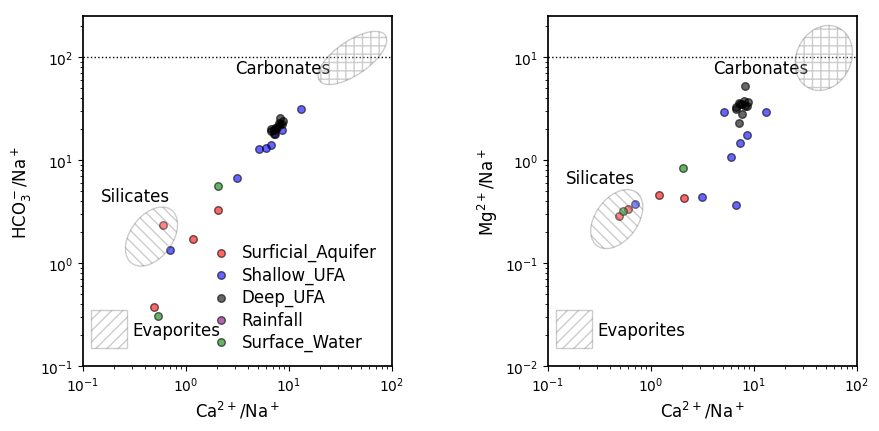

In [18]:
from wqchartpy import gaillardet; 
gaillardet.plot(UFA_df, unit='mg/L', figname='../plots/Gaillardet_KATZDATA', figformat='jpg')

### Interpretation

We see a similar relationship with the Katz dataset. The surficial aquifer wells sit around Lake Bradford

In [7]:
format_df 


,Sample,Label,Color,Marker,Size,Alpha,pH,Ca,Mg,Na,K,HCO3,Cl,SO4,TDS
0,LJ000,Porter Sink,k,o,30,0.9,6.52,3.560,1.812,2.440,1.077,16.836,5.9191,0.0,36.47
1,LJ001,Porter Sink,k,o,30,0.9,5.11,NaN,NaN,NaN,NaN,3.416,NaN,NaN,31.15
2,LJ002,Porter Sink,k,o,30,0.9,6.55,2.393,0.966,1.818,0.949,7.320,4.6700,0.0,22.40
3,LJ003,Porter Sink,k,o,30,0.9,5.99,2.460,1.023,2.275,0.733,8.784,3.8784,0.0,24.50
4,LJ004,Porter Sink,k,o,30,0.9,6.31,2.656,1.197,2.439,0.778,11.956,3.8762,0.0,26.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,PRE001,Rain,y,o,30,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,PRE002,Rain,y,o,30,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,PRE003,Rain,y,o,30,0.9,NaN,NaN,NaN,NaN,NaN,NaN,0.1360,0.0,NaN
152,PRE004,Rain,y,o,30,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
format_df['HCO3'] = format_df['HCO3'].fillna(0)


Gaillardet plot created. Saving it to C:\Users\kcompare\OneDrive - Florida State University (1)\Documents\PhD\Research\LakeJacksonSinkhole\code 



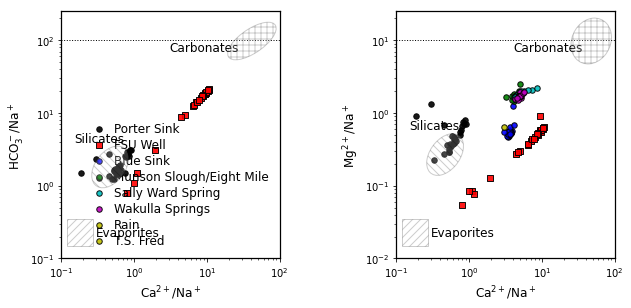

In [16]:
from wqchartpy import gaillardet;
gaillardet.plot(format_df, unit='mg/L', figname='../plots/GaillardetALL', figformat='svg')